In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show(img, time):
    cv2.imshow("frame: ", img)
    cv2.waitKey(time)
    cv2.destroyAllWindows()



[]

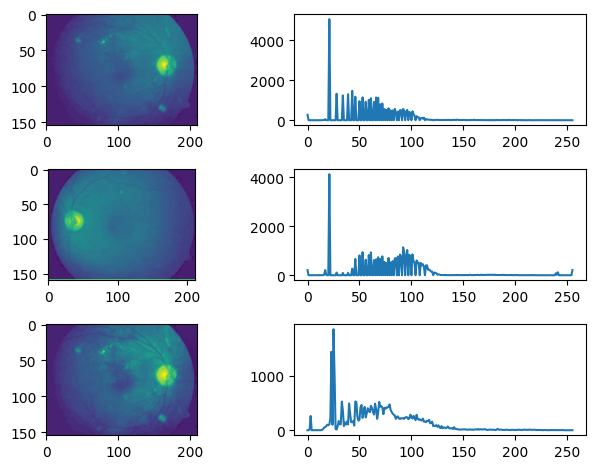

In [8]:
#adapt
ref = cv2.imread('./images/reference.png', 0)
input1 = cv2.imread('./images/input.png', 0)
input1_hist = cv2.calcHist([input1], [0], None, [256], [0,256])

ref_hist = cv2.calcHist([ref], [0], None, [256], [0,256])

clahe = cv2.createCLAHE(clipLimit = 2.0, tileGridSize = (4,4))

equalised = clahe.apply(input1)
equal_hist = cv2.calcHist([equalised], [0], None, [256], [0,256])

fig, axs = plt.subplots(3, 2)

axs[0,0].imshow(input1)
axs[0,1].plot(input1_hist)
axs[1,0].imshow(ref)
axs[1,1].plot(ref_hist)
axs[2,0].imshow(equalised)
axs[2,1].plot(equal_hist)
plt.tight_layout()
plt.plot()

In [16]:
#shrp, median blur, gaussian blur
img = cv2.imread('./images/batman.png')

sharpening_kernel = np.array([[0,-1,0], [-1,4,-1] , [0,-1,0]])
sharp = cv2.filter2D(src = img, ddepth = -1, kernel = sharpening_kernel)

box_filter = np.array([[1,1,1], [1,1,1] , [1,1,1]]) / 9
blurred = cv2.filter2D(src = img, ddepth = -1, kernel = box_filter)

median_blurred = cv2.medianBlur(img, 5)

gauss = cv2.GaussianBlur(img, (7,7), 0)


r = np.concatenate([img, sharp], axis = 1)
s = np.concatenate([blurred, median_blurred, gauss], axis = 1)
show(r, 2000)
show(s, 2000)

# show(sharp, 2000)